#introduction to neural network with Tensor_Flow

Definition of neural network regression is finding the ouput value from given input variables or features by using a new model or existing model.

In [2]:
#import Tensorflow

import tensorflow as tf
print(tf.__version__)


2.15.0


## Creating the features and labels and viewing

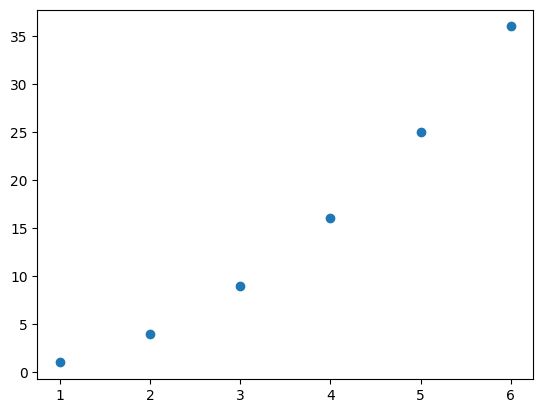

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# creating features
X = np.array([1,2,3,4,5,6])

# creating labels

y= np.array([1,4,9,16,25,36])

# visualizing the realtion

plt.scatter(X,y);

## steps in modelling with tensorflow

1. **Creating a model** -define the input and output layers ,as well as the hidden layers of a deep learning model.
2. **Compile the model** - define the loss function (in other words , the function which tells us how wrong it is.) and the optimizer (it tells our model  how to improve the  patterns its learning). and then evaluation matrices (what can we use to interpret our model).
3. **Fitting the model** - letting the model to find the patterns between X&y (features and labels)

In [4]:
# set the random seed
tf.random.set_seed(42)

# create a model using the sequential API

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

# compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fitting the model
model.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 481ms/step - loss: 20.2047 - mae: 20.2047
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 20.0722 - mae: 20.0722
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 19.9397 - mae: 19.9397
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 19.8072 - mae: 19.8072
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 19.6747 - mae: 19.6747
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 19.5422 - mae: 19.5422
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 19.4097 - mae: 19.4097
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 19.2772 - mae: 19.2772
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 19.1447 - mae: 19.1447
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 19.0122 - mae: 19.0122


In [5]:
model.predict([7])

1/1 [==============================] - 0s 108ms/step


array([[-7.526135]], dtype=float32)

## Improving the model

1. **creating the model** - here ,we can alter the changes like adding more layers or adding more hidden neurons or changing the activation function.
2. **Compiling the model** - here , we can chage the loss function or alter the optimizer and change the **learning rate**
3. **Fitting the model** - here , we can change the number of epochs or alter the data size

In [6]:
# improve the model

#create the model

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

#compile the model

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#fitting the model

model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.3717 - mae: 15.3717
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 13.2263 - mae: 13.2263
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 11.4933 - mae: 11.4933
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 9.9278 - mae: 9.9278
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2950 - mae: 8.2950
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 6.6123 - mae: 6.6123
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 5.3911 - mae: 5.3911
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 4.8909 - mae: 4.8909
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 5.5184 - mae: 5.5184
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.3096 - mae: 6.3096
Epoch 11/100
1/1 [==============================] - 0s 13ms/step 

In [7]:
model.predict([4])

1/1 [==============================] - 0s 138ms/step


array([[15.00032]], dtype=float32)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


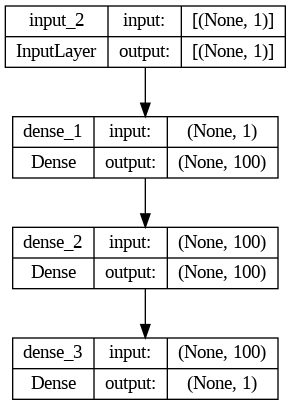

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

## Evaluating the model

In [10]:
# let's work on more data

X = tf.range(-100,100,4)
y = X+10

x_train,x_test,y_train,y_test = X[:40], X[40:], y[:40], y[40:]

In [11]:
# create the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

#compile the model

model.compile(loss ="mse",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# modelsummary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 100)               200       
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#fitting the model

model.fit(x_train , y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 2292.1731 - mae: 41.0340
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 2209.9917 - mae: 40.2787
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 2111.2825 - mae: 39.3813
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 1974.2223 - mae: 38.0837
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 1804.0417 - mae: 36.3794
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 1588.1285 - mae: 34.1671
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 1327.5651 - mae: 31.2827
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 1010.7077 - mae: 27.4759
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 726.4432 - mae: 23.2431
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 449.8832 - mae: 18.3927
Epoch 11/100
2/2 [==================

In [13]:
y_preds = model.predict(x_test)

1/1 [==============================] - 0s 128ms/step


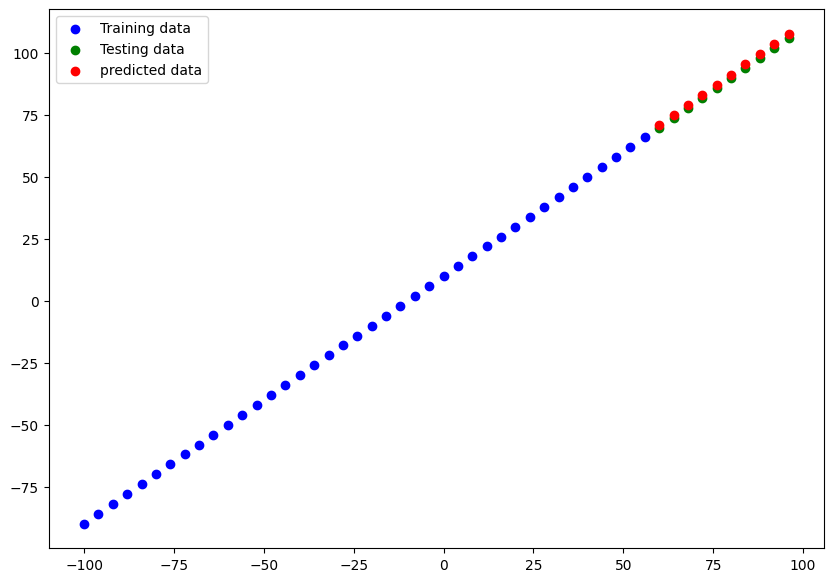

In [14]:
# let's plot the graph
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="b",label="Training data")
plt.scatter(x_test,y_test, c="g",label="Testing data")
plt.scatter(x_test,y_preds,c="r",label="predicted data")
plt.legend();

## Functions :
* For ploting the predictions
* For Evaluation metrics mae
* For Evaluation metrics mse

In [15]:
# function for the plotting the predictions

def plot_predict(x_train = x_train,y_train = y_train,x_test=x_test,y_test=y_test,y_preds=y_preds):
  """
  plotting the graph to check the predictions of model taking inputs x_train,y_train,x_test,y_test,y_preds
  """

  plt.figure(figsize=(10,8))
  plt.scatter(x_train,y_train, c="b" , label = "Training data")
  plt.scatter(x_test, y_test, c="g" , label = "Testing data")
  plt.scatter(x_test, y_preds, c="r" , label = "Predictions")
  plt.legend();

In [16]:
# function of mean_absolute_error

def mae(y_test=y_test,y_preds=y_preds):
  return tf.metrics.mean_absolute_error(y_test, y_preds.squeeze()).numpy()

# function of mean_squared_error

def mse(y_test=y_test, y_preds=y_preds):
  return tf.metrics.mean_squared_error(y_test, y_preds.squeeze()).numpy()

## Improving the model

Experiment ,Experiment, Experiment

In [17]:
# Building the model-1

tf.random.set_seed(42)

# create the model

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1,input_shape=(1,)))

#compile the model

model_1.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"])

#fit the model

model_1.fit(x_train,y_train,epochs=100)



Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 25.1116 - mse: 944.6017
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.2809 - mse: 883.3545
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 23.4904 - mse: 827.1961
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 22.6699 - mse: 772.0679
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 21.8783 - mse: 720.5169
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 21.1201 - mse: 668.0795
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 20.3237 - mse: 619.0881
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 19.5124 - mse: 569.0453
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8135 - mse: 529.3009
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 18.0837 - mse: 488.1255
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 100ms/step


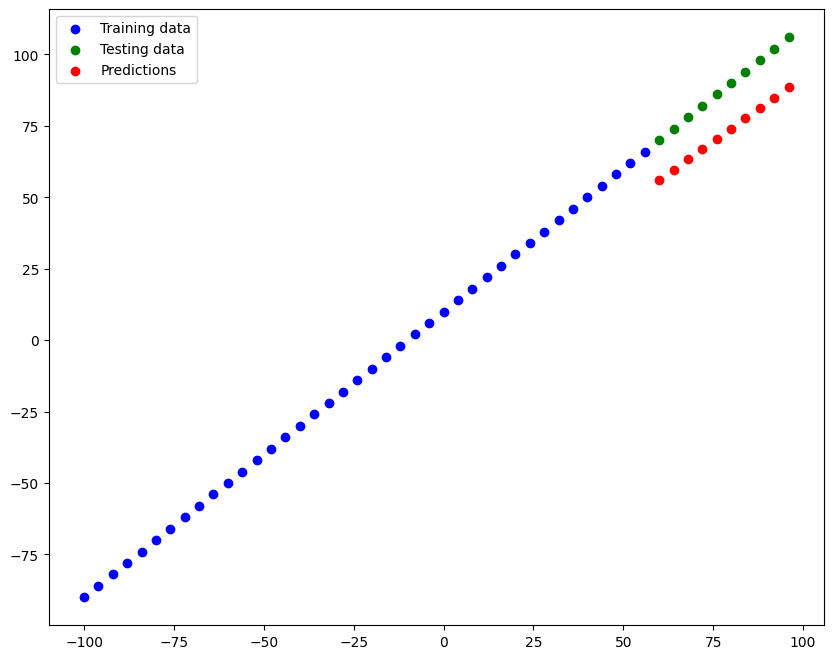

In [18]:
# making the predictions

y_preds_1 = model_1.predict(x_test)
plot_predict(y_preds=y_preds_1)

In [19]:
# evaluating the model_1
mae_1=mae(y_preds=y_preds_1)
mse_1=mse(y_preds=y_preds_1)

### Building model_2

In [20]:
tf.random.set_seed(42)

#create the model

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10,input_shape=(1,)))
model_2.add(tf.keras.layers.Dense(1))

#compile the model

model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(learning_rate=(0.01)),
                metrics = ["mae"])

# fit the model

model_2.fit(x_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 26.9723 - mae: 26.9723
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 20.2154 - mae: 20.2154
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 13.9527 - mae: 13.9527
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7347 - mae: 8.7347
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0454 - mae: 9.0454
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4256 - mae: 11.4256
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4914 - mae: 12.4914
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6314 - mae: 12.6314
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0819 - mae: 12.0819
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.9737 - mae: 10.9737
Epoch 11/100
2/2 [==============================] - 0s 8ms/ste

1/1 [==============================] - 0s 84ms/step


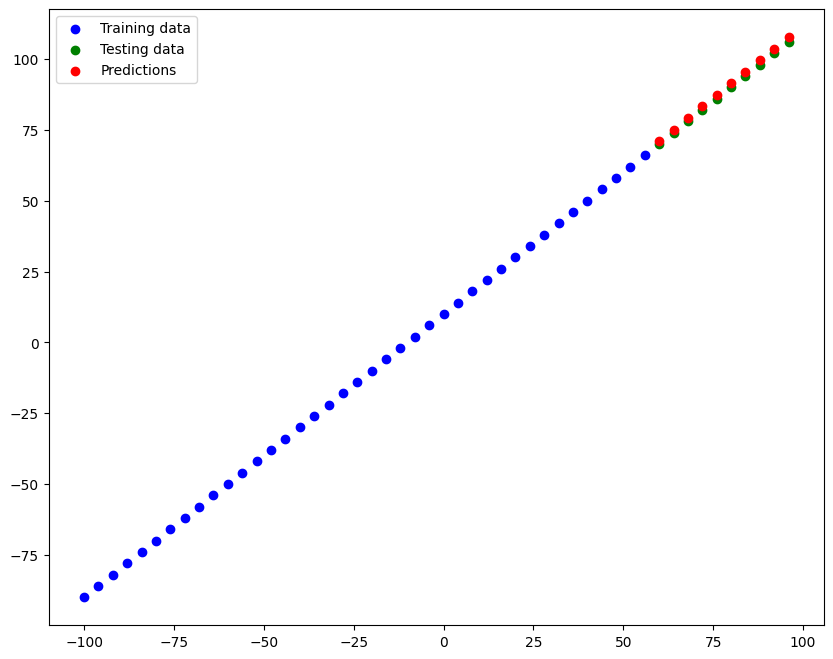

In [21]:
#making predictions model_2

y_preds_2 = model_2.predict(x_test)

plot_predict(y_preds=y_preds_2)

In [22]:
# evaluation of model_2

mae_2=mae(y_preds=y_preds_2)
mse_2=mse(y_preds = y_preds_2)

### building the model_3

In [23]:
tf.random.set_seed(42)

#create the model

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10,input_shape=(1,)))
model_3.add(tf.keras.layers.Dense(1))

#compile the model

model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(learning_rate=(0.01)),
                metrics=["mae"])

# fit the model

model_3.fit(x_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 59.3068 - mae: 59.3068
Epoch 2/500
2/2 [==============================] - 0s 15ms/step - loss: 53.3049 - mae: 53.3049
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 47.5781 - mae: 47.5781
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 41.7265 - mae: 41.7265
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 36.0086 - mae: 36.0086
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 30.3231 - mae: 30.3231
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 24.5300 - mae: 24.5300
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 18.7435 - mae: 18.7435
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 13.4137 - mae: 13.4137
Epoch 10/500
2/2 [==============================] - 0s 13ms/step - loss: 8.9817 - mae: 8.9817
Epoch 11/500
2/2 [==============================] - 

1/1 [==============================] - 0s 113ms/step


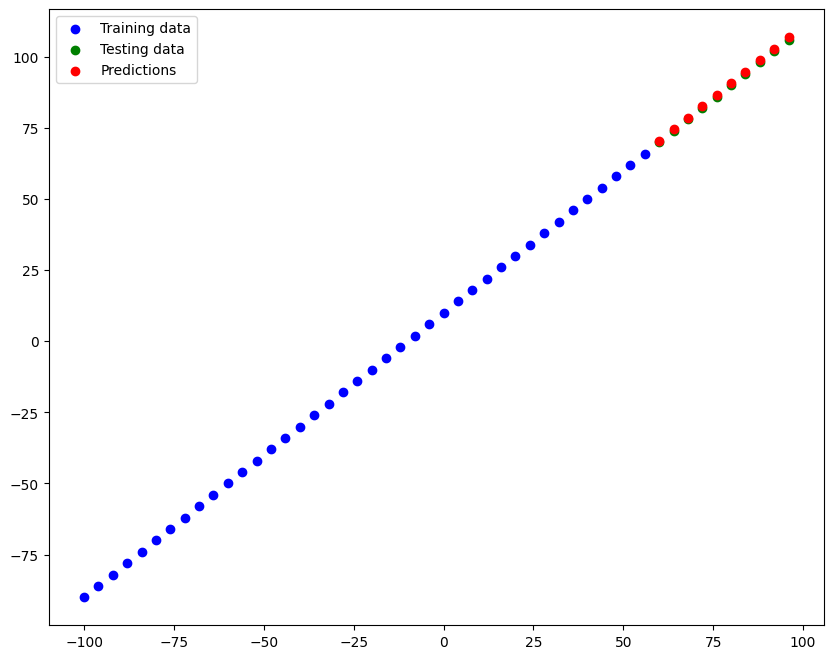

In [24]:
# making the predictions
y_preds_3 = model_3.predict(x_test)
plot_predict(y_preds=y_preds_3)

In [25]:
# evaluating the model_3

mae_3=mae(y_preds=y_preds_3)
mse_3=mse(y_preds=y_preds_3)

## comparing the models

In [26]:
import pandas as pd

model = {"models":["model_1","model_2","model_3"],
         "mae":[mae_1,mae_2,mae_3],
         "mse":[mse_1,mse_2,mse_3]}

data=pd.DataFrame(model)
data

,models,mae,mse
0,model_1,15.761111,249.703369
1,model_2,1.373536,1.927984
2,model_3,0.690342,0.488139


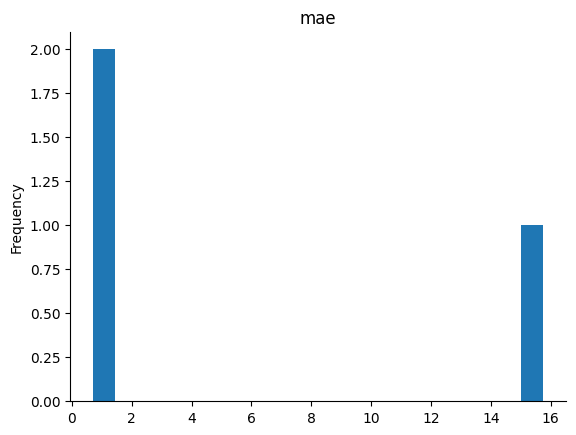

In [27]:
from matplotlib import pyplot as plt
data['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
[model.keys()]

[dict_keys(['models', 'mae', 'mse'])]

## Save the model

In [29]:
model_3.save("best_model_save_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
load_model = tf.keras.models.load_model("best_model_save_model.h5")
load_model.predict(x_test)

1/1 [==============================] - 0s 87ms/step


array([[ 70.52185 ],
       [ 74.55929 ],
       [ 78.59673 ],
       [ 82.63417 ],
       [ 86.671616],
       [ 90.70906 ],
       [ 94.746506],
       [ 98.78396 ],
       [102.821396],
       [106.85884 ]], dtype=float32)

In [82]:
y_preds_3


array([[ 70.52185 ],
       [ 74.55929 ],
       [ 78.59673 ],
       [ 82.63417 ],
       [ 86.671616],
       [ 90.70906 ],
       [ 94.746506],
       [ 98.78396 ],
       [102.821396],
       [106.85884 ]], dtype=float32)

## A Large Model

In [32]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### preprocessing the data

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

ct=ColumnTransformer([("min_max",MinMaxScaler(),["age","bmi","children"]),
                      ("onehot",OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])])

x = insurance.drop("charges",axis=1)
y = insurance["charges"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train_normal = ct.fit_transform(x_train)
x_test_normal = ct.fit_transform(x_test)

In [40]:
x_train_normal.shape

(1070, 11)

### build the model

In [48]:
tf.random.set_seed(42)

#create the model

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(100,activation = "relu"))
insurance_model.add(tf.keras.layers.Dense(1))

#compile the model

insurance_model.compile(loss = "mae",
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics =["mae"])

#fitting the model

history = insurance_model.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13345.0908 - mae: 13345.0908
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13334.3086 - mae: 13334.3086
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 10226.7510 - mae: 10226.7510
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 5978.8081 - mae: 5978.8081
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5442.4170 - mae: 5442.4170
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 5258.9380 - mae: 5258.9380
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 5052.6157 - mae: 5052.6157
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 5847.1860 - mae: 5847.1860
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 5262.7949 - mae: 5262.7949
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 4998.0796 - mae: 499

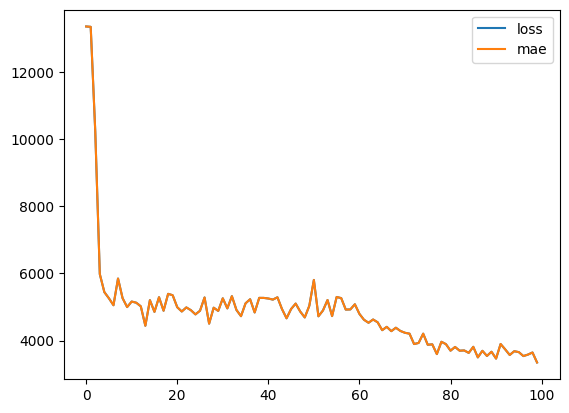

In [51]:
pd.DataFrame(history.history).plot();

In [79]:
tf.random.set_seed(42)

#create the model

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(100,activation = None))
insurance_model.add(tf.keras.layers.Dense(100,activation = "relu"))
insurance_model.add(tf.keras.layers.Dense(1))

#compile the model

insurance_model.compile(loss = "mae",
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics =["mae"])

#fitting the model

history = insurance_model.fit(x_train_normal,y_train,epochs=150)

Epoch 1/150
34/34 [==============================] - 2s 7ms/step - loss: 12205.0459 - mae: 12205.0459
Epoch 2/150
34/34 [==============================] - 0s 8ms/step - loss: 8053.3086 - mae: 8053.3086
Epoch 3/150
34/34 [==============================] - 0s 7ms/step - loss: 7116.7573 - mae: 7116.7573
Epoch 4/150
34/34 [==============================] - 0s 6ms/step - loss: 5122.1021 - mae: 5122.1021
Epoch 5/150
34/34 [==============================] - 0s 6ms/step - loss: 3772.8481 - mae: 3772.8481
Epoch 6/150
34/34 [==============================] - 0s 5ms/step - loss: 3711.1548 - mae: 3711.1548
Epoch 7/150
34/34 [==============================] - 0s 7ms/step - loss: 3644.3857 - mae: 3644.3857
Epoch 8/150
34/34 [==============================] - 0s 5ms/step - loss: 3745.3293 - mae: 3745.3293
Epoch 9/150
34/34 [==============================] - 0s 7ms/step - loss: 3661.4414 - mae: 3661.4414
Epoch 10/150
34/34 [==============================] - 0s 8ms/step - loss: 3565.4346 - mae: 3565.43

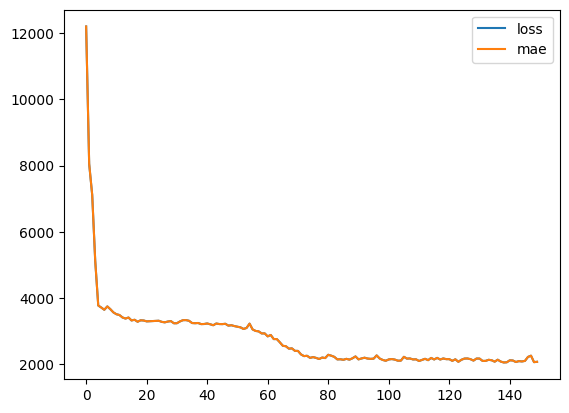

In [80]:
pd.DataFrame(history.history).plot();

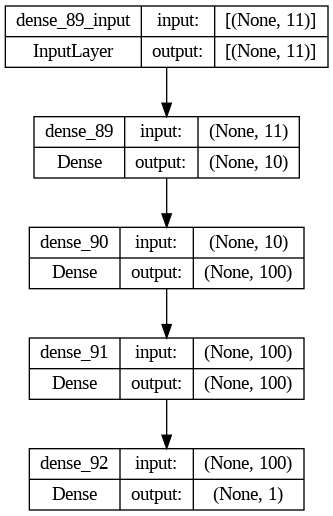

In [83]:
from tensorflow.keras.utils import plot_model
plot_model(model=insurance_model,show_shapes=True)